In [5]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
path = "../../data/cleaned_data/resales_processed_"
resales_frames = [pd.read_csv(f"{path}{letter}") for letter in
                  ['aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj']]

columns = resales_frames[0].columns
for df in resales_frames:
    df.columns = columns

resales = pd.concat(resales_frames, axis=0, ignore_index=True)

In [9]:
# sorted by max floor level, descending
resales = resales.sort_values(by='max_floor_lvl', ascending=False)

In [10]:
# correlation between max floor level and reale price
resales[['max_floor_lvl', 'resale_price']].corr()

,max_floor_lvl,resale_price
max_floor_lvl,1.000000,0.418706
resale_price,0.418706,1.000000


In [11]:
filtered = resales[['year_sold', 'town', 'address', 'max_floor_lvl']]

In [12]:
# remove duplicates
filtered = filtered.drop_duplicates(subset=['year_sold', 'town', 'address'])

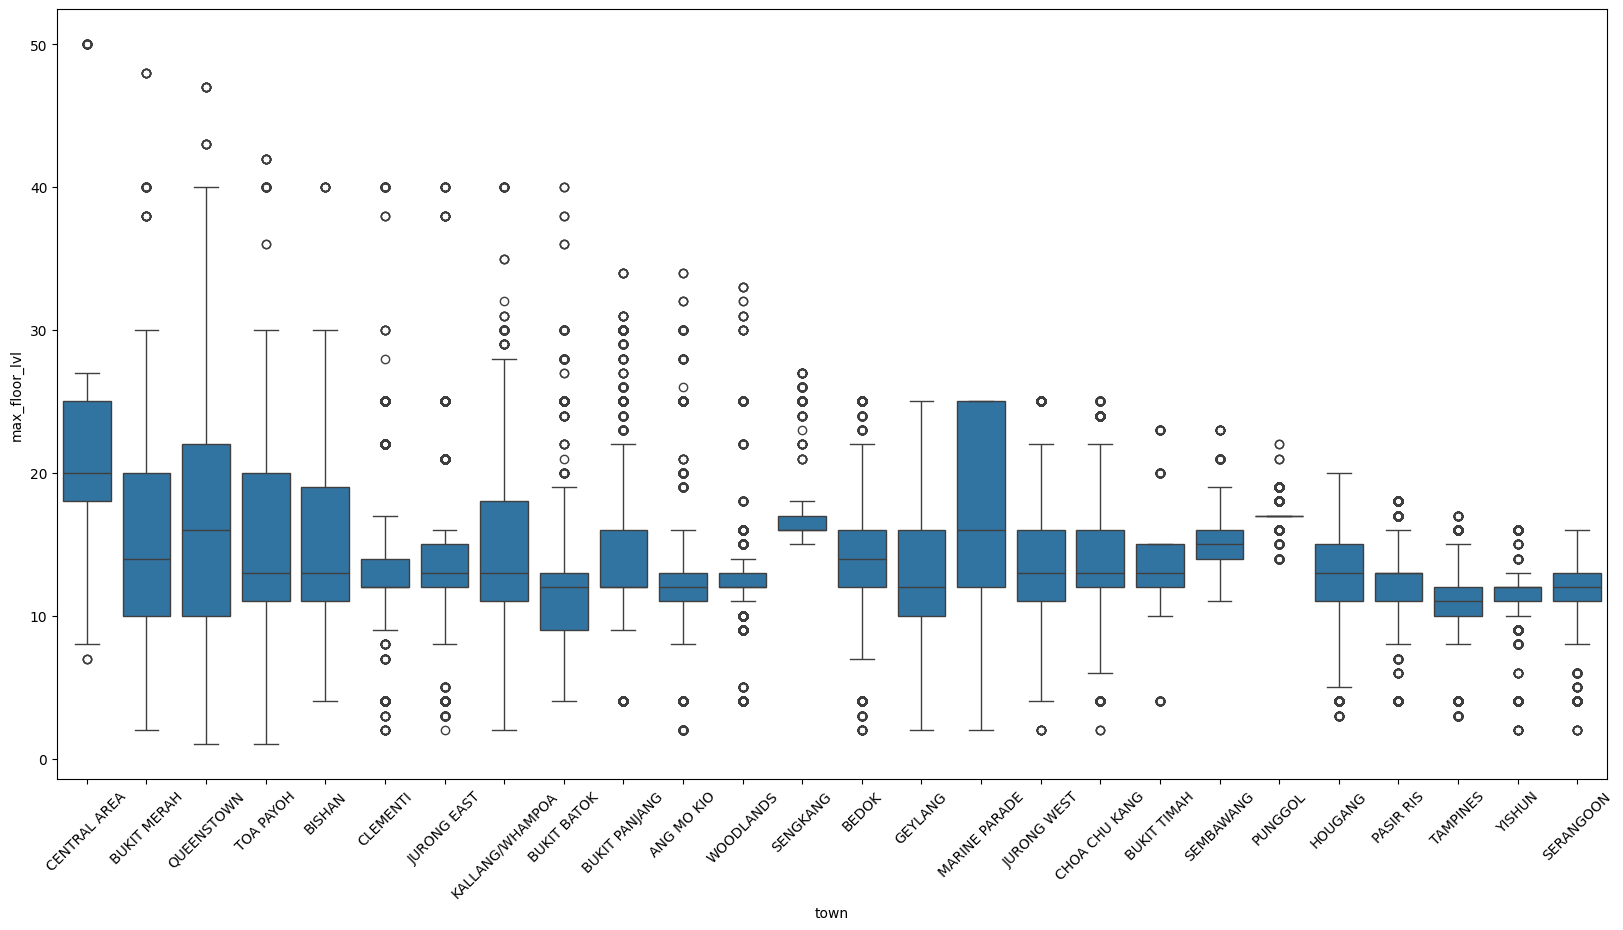

In [13]:
# plot the distribution of max floor level by town
plt.figure(figsize=(20, 10))
sns.boxplot(x='town', y='max_floor_lvl', data=filtered)
plt.xticks(rotation=45)
plt.show()


In [68]:
from bs4 import BeautifulSoup
# import requests
import urllib.request

In [117]:
html_doc = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_Singapore_MRT_stations').read()

In [118]:
soup = BeautifulSoup(html_doc, 'html.parser')

In [119]:
# get id bodyContent
bodyContent = soup.find(id='bodyContent')

In [120]:
# get class = sortable
sortable = bodyContent.find_all(class_='sortable')
table = sortable[0]

In [121]:
table_rows = table.find_all('tr')

In [122]:
table_rows

[<tr>
 <th>Alpha-numeric code(s)</th>
 <th colspan="3">Station name</th>
 <th rowspan="2">Opening</th>
 <th rowspan="2">Name(s) during planning stages
 </th>
 <th rowspan="2">Abbreviation</th>
 <th rowspan="2">Location(s)</th>
 <th rowspan="2">Interchange;<br/><small>Adjacent transportation</small>
 </th></tr>,
 <tr>
 <th>In operation</th>
 <th><a href="/wiki/English_language" title="English language">English</a> • <a href="/wiki/Malay_language" title="Malay language">Malay</a></th>
 <th><a href="/wiki/Chinese_language" title="Chinese language">Chinese</a></th>
 <th><a class="mw-redirect" href="/wiki/Tamil_Language" title="Tamil Language">Tamil</a>
 </th></tr>,
 <tr bgcolor="#d42e12">
 <td colspan="9" style="text-align:center"><b><a href="/wiki/North%E2%80%93South_MRT_line" title="North–South MRT line"><span style="color:white">North–South Line (NSL)</span></a></b>
 </td></tr>,
 <tr>
 <td><span style="display:inline-block"><span style="background-color:#d42e12;text-align:center;line-he

In [123]:
rows = 0

date = None

d = {}

for tr in table_rows:
    # find hrefs with title attribute containing "MRT"
    # and get the title attribute
    station_name = tr.find_all('a', title=lambda x: x and 'MRT station' in x or x and 'MRT/LRT station' in x)
    # get text
    if station_name:
        mrt_station = station_name[0].text
    td = tr.find_all('td')
    if rows > 0:
        if mrt_station not in d:
            d[mrt_station] = date
        rows -= 1
    else:
        for i in td:
            text = i.text.strip()
            try:
                text = pd.to_datetime(text)
                if mrt_station not in d:
                    d[mrt_station] = i.text
                # check the rowspan attribute
                # if it exists, add the next n rows
                # to the current row
                if i.has_attr('rowspan'):
                    r = int(i['rowspan'])
                    if r > 1:
                        rows = r-1
                        date = i.text
            except:
                continue


d

{'Jurong East': '10 March 1990',
 'Bukit Batok': '10 March 1990',
 'Bukit Gombak': '10 March 1990',
 'Brickland': '2034',
 'Choa Chu Kang': '10 March 1990',
 'Yew Tee': '10 February 1996',
 'Kranji': '10 February 1996',
 'Marsiling': '10 February 1996',
 'Woodlands': '10 February 1996',
 'Admiralty': '10 February 1996',
 'Sembawang': '10 February 1996',
 'Canberra': '2 November 2019',
 'Yishun': '20 December 1988',
 'Khatib': '20 December 1988',
 'Yio Chu Kang': '7 November 1987',
 'Ang Mo Kio': '7 November 1987',
 'Bishan': '7 November 1987',
 'Braddell': '7 November 1987',
 'Toa Payoh': '7 November 1987',
 'Novena': '12 December 1987',
 'Newton': '12 December 1987',
 'Orchard': '12 December 1987',
 'Somerset': '12 December 1987',
 'Dhoby Ghaut': '12 December 1987',
 'City Hall': '12 December 1987',
 'Raffles Place': '12 December 1987',
 'Marina Bay': '4 November 1989',
 'Marina South Pier': '23 November 2014',
 'Pasir Ris': '16 December 1989',
 'Tampines': '16 December 1989',
 'Simei

In [124]:
html_doc = urllib.request.urlopen('https://en.wikipedia.org/wiki/List_of_Singapore_LRT_stations').read()


In [125]:
soup = BeautifulSoup(html_doc, 'html.parser')

# get id bodyContent
bodyContent = soup.find(id='bodyContent')

# get class = sortable
sortable = bodyContent.find_all(class_='sortable')
table = sortable[0]

In [126]:
table_rows = table.find_all('tr')

rows = 0

date = None
lrts = {}

for tr in table_rows:
    # find hrefs with title attribute containing "LRT"
    # and get the title attribute
    station_name = tr.find_all('a', title=lambda x: x and 'LRT station' in x)
    # get text
    if station_name:
        lrt_station = station_name[0].text
    td = tr.find_all('td')
    if rows > 0:
        if lrt_station not in lrts:
            lrts[lrt_station] = date
        rows -= 1
    else:
        for i in td:
            text = i.text.strip()
            try:
                text = pd.to_datetime(text)
                if lrt_station not in lrts:
                    lrts[lrt_station] = i.text
                # check the rowspan attribute
                # if it exists, add the next n rows
                # to the current row
                if i.has_attr('rowspan'):
                    r = int(i['rowspan'])
                    if r > 1:
                        rows = r-1
                        date = i.text
            except:
                continue

In [127]:
# strip trailing whitespace
for key in lrts.keys():
    lrts[key] = lrts[key].strip()

In [128]:
# only add to d if key not there

for key in lrts.keys():
    if key not in d:
        d[key] = lrts[key]

In [129]:
d

{'Jurong East': '10 March 1990',
 'Bukit Batok': '10 March 1990',
 'Bukit Gombak': '10 March 1990',
 'Brickland': '2034',
 'Choa Chu Kang': '10 March 1990',
 'Yew Tee': '10 February 1996',
 'Kranji': '10 February 1996',
 'Marsiling': '10 February 1996',
 'Woodlands': '10 February 1996',
 'Admiralty': '10 February 1996',
 'Sembawang': '10 February 1996',
 'Canberra': '2 November 2019',
 'Yishun': '20 December 1988',
 'Khatib': '20 December 1988',
 'Yio Chu Kang': '7 November 1987',
 'Ang Mo Kio': '7 November 1987',
 'Bishan': '7 November 1987',
 'Braddell': '7 November 1987',
 'Toa Payoh': '7 November 1987',
 'Novena': '12 December 1987',
 'Newton': '12 December 1987',
 'Orchard': '12 December 1987',
 'Somerset': '12 December 1987',
 'Dhoby Ghaut': '12 December 1987',
 'City Hall': '12 December 1987',
 'Raffles Place': '12 December 1987',
 'Marina Bay': '4 November 1989',
 'Marina South Pier': '23 November 2014',
 'Pasir Ris': '16 December 1989',
 'Tampines': '16 December 1989',
 'Simei

In [130]:
dates = pd.DataFrame(d.items(), columns=['station', 'opening_date'])

In [131]:
# find rows where opening_date = "\n"
dates[dates['opening_date'] == "\n"]
# remove them
dates = dates[dates['opening_date'] != "\n"]

In [132]:
dates['opening_date'] = pd.to_datetime(dates['opening_date']).dt.date

In [133]:
# save to csv
dates.to_csv('mrt_stations_opening_dates.csv', index=False)


In [134]:
dates['station'] = dates['station'].str.upper()

In [135]:
dates

,station,opening_date
0,JURONG EAST,1990-03-10
1,BUKIT BATOK,1990-03-10
2,BUKIT GOMBAK,1990-03-10
3,BRICKLAND,2034-01-01
4,CHOA CHU KANG,1990-03-10
...,...,...
211,PUNGGOL POINT,2016-12-29
212,SAMUDERA,2017-03-31
213,NIBONG,2014-06-29
214,SUMANG,2014-06-29


In [136]:
train_stations = pd.read_csv('train_stations_OneMapAPI.csv')

In [137]:
train_stations

,lat,lng,station_name,postal
0,1.357479,103.987884,CHANGI AIRPORT MRT STATION (CG2),819661
1,1.334550,103.961548,EXPO MRT STATION (CG1),486065
2,1.373043,103.949285,PASIR RIS MRT STATION (EW1),519634
3,1.353302,103.945145,TAMPINES MRT STATION (EW2),529538
4,1.343197,103.953377,SIMEI MRT STATION (EW3),529888
...,...,...,...,...
194,1.416849,103.906651,PUNGGOL POINT LRT STATION (PW3),828644
195,1.415902,103.902156,SAMUDERA LRT STATION (PW4),828645
196,1.411854,103.900339,NIBONG LRT STATION (PW5),828862
197,1.408452,103.898558,SUMANG LRT STATION (PW6),828863


In [142]:
def shorten(name):
    name = name.split()
    # index of "MRT"
    try:
        index = name.index('MRT')
        return ' '.join(name[:index])
    except:
        return ' '.join(name)

def shorten_again(name):
    name = name.split()
    # index of "LRT"
    try:
        index = name.index('LRT')
        return ' '.join(name[:index])
    except:
        return ' '.join(name)

In [143]:
train_stations['merging_column'] = train_stations['station_name'].apply(shorten)
train_stations['merging_column'] = train_stations['merging_column'].apply(shorten_again)

In [144]:
train_stations

,lat,lng,station_name,postal,merging_column
0,1.357479,103.987884,CHANGI AIRPORT MRT STATION (CG2),819661,CHANGI AIRPORT
1,1.334550,103.961548,EXPO MRT STATION (CG1),486065,EXPO
2,1.373043,103.949285,PASIR RIS MRT STATION (EW1),519634,PASIR RIS
3,1.353302,103.945145,TAMPINES MRT STATION (EW2),529538,TAMPINES
4,1.343197,103.953377,SIMEI MRT STATION (EW3),529888,SIMEI
...,...,...,...,...,...
194,1.416849,103.906651,PUNGGOL POINT LRT STATION (PW3),828644,PUNGGOL POINT
195,1.415902,103.902156,SAMUDERA LRT STATION (PW4),828645,SAMUDERA
196,1.411854,103.900339,NIBONG LRT STATION (PW5),828862,NIBONG
197,1.408452,103.898558,SUMANG LRT STATION (PW6),828863,SUMANG


In [145]:
# merge on merging_column
merged = pd.merge(train_stations, dates, left_on='merging_column', right_on='station', how='left')

In [146]:
# check nan values
merged[merged['opening_date'].isna()]


,lat,lng,station_name,postal,merging_column,station,opening_date
137,1.448292,103.785693,WOODLANDS NORTH MRT STATION (TE1),737668,WOODLANDS NORTH,NaN,NaN
139,1.427396,103.793264,WOODLANDS SOUTH MRT STATION (TE3),737741,WOODLANDS SOUTH,NaN,NaN
147,1.306782,103.818957,NAPIER MRT STATION (TE12),258511,NAPIER,NaN,NaN
148,1.302422,103.823869,ORCHARD BOULEVARD MRT STATION (TE13),248654,ORCHARD BOULEVARD,NaN,NaN
150,1.293948,103.833721,GREAT WORLD MRT STATION (TE15),238384,GREAT WORLD,NaN,NaN
151,1.288505,103.833586,HAVELOCK MRT STATION (TE16),168604,HAVELOCK,NaN,NaN
153,1.280533,103.843884,MAXWELL MRT STATION (TE18),58841,MAXWELL,NaN,NaN
154,1.277717,103.850368,SHENTON WAY MRT STATION (TE19),18928,SHENTON WAY,NaN,NaN
193,1.412771,103.906578,TECK LEE LRT STATION (PW2),828861,TECK LEE,NaN,NaN


In [147]:
to_add = {'WOODLANDS NORTH': '31 January 2020',
          'WOODLANDS SOUTH': '31 January 2020',
          'NAPIER': '13 November 2022',
          'ORCHARD BOULEVARD': '13 November 2022',
          'GREAT WORLD': '13 November 2022',
          'HAVELOCK': '13 November 2022',
          'MAXWELL': '13 November 2022',
          'SHENTON WAY': '13 November 2022',}

for station, date in to_add.items():
    merged.loc[merged['merging_column'] == station, 'opening_date'] = date

merged[merged['opening_date'].isna()]

,lat,lng,station_name,postal,merging_column,station,opening_date
193,1.412771,103.906578,TECK LEE LRT STATION (PW2),828861,TECK LEE,NaN,NaN


In [149]:
# check nan
merged[merged['opening_date'].isna()]
# remove nan
merged = merged[~merged['opening_date'].isna()]

In [151]:
# drop merging column and station column
merged = merged.drop(columns=['merging_column', 'station'])

In [153]:
# # save to csv
# merged.to_csv('train_stations_opening_dates.csv', index=False)

In [158]:
merged['opening_date'] = pd.to_datetime(merged['opening_date']).dt.year

In [160]:
merged

,lat,lng,station_name,postal,opening_date
0,1.357479,103.987884,CHANGI AIRPORT MRT STATION (CG2),819661,2002
1,1.334550,103.961548,EXPO MRT STATION (CG1),486065,2001
2,1.373043,103.949285,PASIR RIS MRT STATION (EW1),519634,1989
3,1.353302,103.945145,TAMPINES MRT STATION (EW2),529538,1989
4,1.343197,103.953377,SIMEI MRT STATION (EW3),529888,1989
...,...,...,...,...,...
194,1.416849,103.906651,PUNGGOL POINT LRT STATION (PW3),828644,2016
195,1.415902,103.902156,SAMUDERA LRT STATION (PW4),828645,2017
196,1.411854,103.900339,NIBONG LRT STATION (PW5),828862,2014
197,1.408452,103.898558,SUMANG LRT STATION (PW6),828863,2014


In [162]:
### KNN TO FIND NEAREST STATION ###

# Function to compute the distance between two geolocations -- all taken from first_call_main.py
from math import sin, cos, sqrt, atan2, radians

def earth_distance(x, y):
  R = 6373.0

  lat1, lng1 = radians(x[0]), radians(x[1])
  lat2, lng2 = radians(y[0]), radians(y[1])

  dlon = lng2 - lng1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))
  return R * c

# For each resale record, find nearest train station and the distance from it
from sklearn.neighbors import KNeighborsClassifier

# for each year in resales, get a dataframe of train stations opened in that year
# for each year in resales, get a dataframe of train stations opened in that year

# split resales into dataframes per year

for year in resales['year_sold'].unique():
    print('year: ', year)
    year = int(year)
    train_stations = merged[merged['opening_date'] <= year]

    knn = KNeighborsClassifier(n_neighbors=1, algorithm='brute', metric=earth_distance)
    knn.fit(train_stations[['lat', 'lng']], train_stations['station_name'])

    nearest_station = knn.predict(resales[resales['year_sold'] == year][['lat', 'lng']])
    station_dist = knn.kneighbors(resales[resales['year_sold'] == year][['lat', 'lng']])[0][:, 0]

    resales.loc[resales['year_sold'] == year, 'nearest_station'] = nearest_station
    resales.loc[resales['year_sold'] == year, 'station_dist'] = station_dist


year:  2016
year:  2022
year:  2020
year:  2015
year:  2023
year:  2019
year:  2021
year:  2017
year:  2018
year:  2014
year:  2024
year:  2013
year:  2011
year:  2012
year:  1997
year:  2010
year:  1999
year:  2009
year:  1996
year:  1995
year:  1990
year:  2008
year:  1991
year:  1993
year:  1998
year:  1992
year:  1994
year:  2007
year:  2006
year:  2003
year:  2002
year:  2005
year:  2004
year:  2001
year:  2000


In [166]:
# filter only town, address, nearest station and station dist
filtered = resales[['year_sold', 'town', 'address', 'nearest_station', 'station_dist']]

In [172]:
# sort by year sold
filtered = filtered.sort_values(by='year_sold')

In [180]:
filtered.head(100)

,year_sold,town,address,nearest_station,station_dist
11156,1990,BUKIT MERAH,BLANGAH VIEW,REDHILL MRT STATION (EW18),1.818699
11533,1990,SERANGOON,126 SERANGOON NORTH AVENUE 1 SINGAPORE 550126,ANG MO KIO MRT STATION (NS16),2.518727
5962,1990,ANG MO KIO,ANG MO KIO 22,ANG MO KIO MRT STATION (NS16),0.958774
11509,1990,SERANGOON,HWI YOH COURT,ANG MO KIO MRT STATION (NS16),2.298110
5843,1990,ANG MO KIO,211 ANG MO KIO AVENUE 3 SINGAPORE 560211,ANG MO KIO MRT STATION (NS16),0.881324
...,...,...,...,...,...
6536,1990,JURONG EAST,210 JURONG EAST STREET 21 SINGAPORE 600210,JURONG EAST MRT STATION (EW24 / NS1),0.761632
7889,1990,MARINE PARADE,YWCA MARINE DRIVE CHILD DEVELOPMENT CENTRE,EUNOS MRT STATION (EW7),1.905384
7890,1990,MARINE PARADE,MARINE DRIVE GARDENS,EUNOS MRT STATION (EW7),1.846335
6537,1990,JURONG EAST,214 JURONG EAST STREET 21 SINGAPORE 600214,JURONG EAST MRT STATION (EW24 / NS1),0.774712


In [175]:
# # save new resales
# resales.to_csv('../../data/cleaned_data/resales_processed.csv', index=False)